# Clustering Conformations coordinate based using Python Libraries

## Import dependencies

In [1]:
import numpy as np
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, to_tree, centroid, cut_tree,fcluster
from matplotlib import pyplot as plt
from helper import info,calc_coord_based_matrix,threshold_remove,multirun
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Isolate lists with missing residues beyond a threshold

In [2]:
calc_coord_based_matrix(7)

Threshold: 7 amount removed: 176
new_seg_list: 355
imputation done


matrix([[ 23.58454   , -27.874277  ],
        [-13.626364  ,  -4.405115  ],
        [-26.924532  ,  -5.0980835 ],
        [-15.264172  ,  20.897379  ],
        [-15.342412  ,  20.891111  ],
        [-27.210373  ,  27.343657  ],
        [-15.272377  ,  28.872364  ],
        [ -1.6920923 ,  21.649565  ],
        [ -2.978213  ,  26.850254  ],
        [-13.235662  ,  31.312963  ],
        [-23.04836   ,   2.4820557 ],
        [-23.39797   ,   2.360529  ],
        [-17.566095  ,   3.2856174 ],
        [-17.46737   ,   2.5040722 ],
        [-23.563942  ,  -2.792285  ],
        [-22.808666  ,  -6.7798057 ],
        [-23.894194  ,  -2.426742  ],
        [-24.581766  ,  -5.0589232 ],
        [-25.265089  ,  -0.9178223 ],
        [-22.28528   ,   0.33710384],
        [-14.363712  ,  -7.0216956 ],
        [-20.126123  ,   7.2444367 ],
        [-13.572023  ,  -6.5994134 ],
        [-26.853403  ,  -6.4901323 ],
        [-10.936927  ,  -6.0577765 ],
        [-26.78844   ,   9.795863  ],
        [-13

In [4]:
with open("reduced_chains_list.var","rb") as reduced_chains_list_var:
   reduced_chains_list = pickle.load(reduced_chains_list_var)
   reduced_chains_list_var.close()
#print(f"chains_list: {chains_list}")
with open("structures/opened_active.var", "rb") as open_active_var:
    open_active_list = pickle.load(open_active_var)
    open_active_var.close()
with open("structures/closed_inactive.var", "rb") as closed_inactive_var:
    closed_inactive_list = pickle.load(closed_inactive_var)
    closed_inactive_var.close()
with open("structures/opened_inactive.var", "rb") as open_inactive_var:
    open_inactive_list = pickle.load(open_inactive_var)
    open_inactive_var.close()

print(f"open_active: {len(open_active_list)}")
print(f"closed_inactive: {len(closed_inactive_list)}")
print(f"open_inactive: {len(open_inactive_list)}")
annotated_dict_list_codes= {"open_active": open_active_list, "closed_inactive": closed_inactive_list, "open_inactive": open_inactive_list} #dictionary of codes list
annotated_dict_list ={"open_active": list(), "closed_inactive": list(), "open_inactive": list()} #dictionary of list of indices
for i,conformation in enumerate(reduced_chains_list):
    for j,l in enumerate(annotated_dict_list_codes):
        if conformation in annotated_dict_list_codes[l]:
            #print(f"l: {l}")
            annotated_dict_list[l].append(i)
print(f"reduced lengths")
for key in annotated_dict_list:
    print(f"{key}: {len(annotated_dict_list[key])}")

open_active: 162
closed_inactive: 277
open_inactive: 92
reduced lengths
open_active: 162
closed_inactive: 121
open_inactive: 72


In [4]:
with open("matrix_seg_coords.var", "rb") as matrix_seg_coords_var:
   matrix_seg_coords = (pickle.load(matrix_seg_coords_var))
   matrix_seg_coords_var.close()
print(f"matrix_seg_coords: {np.shape(matrix_seg_coords)}")
print(f"reduced_chains_list: {np.shape(reduced_chains_list)}")


matrix_seg_coords: (355, 2)
reduced_chains_list: (355,)


### Experiment 2
Threshold = 298, we keep all of our conformations
### Analysis
Although still an F1 score of 0.941872.
Note: the classification results F1 score are based on the MICE imputation which is semi-random based on the samples used.

shape axis1: (355,) axis2: (355,)
group: open_active
group: closed_inactive
group: open_inactive


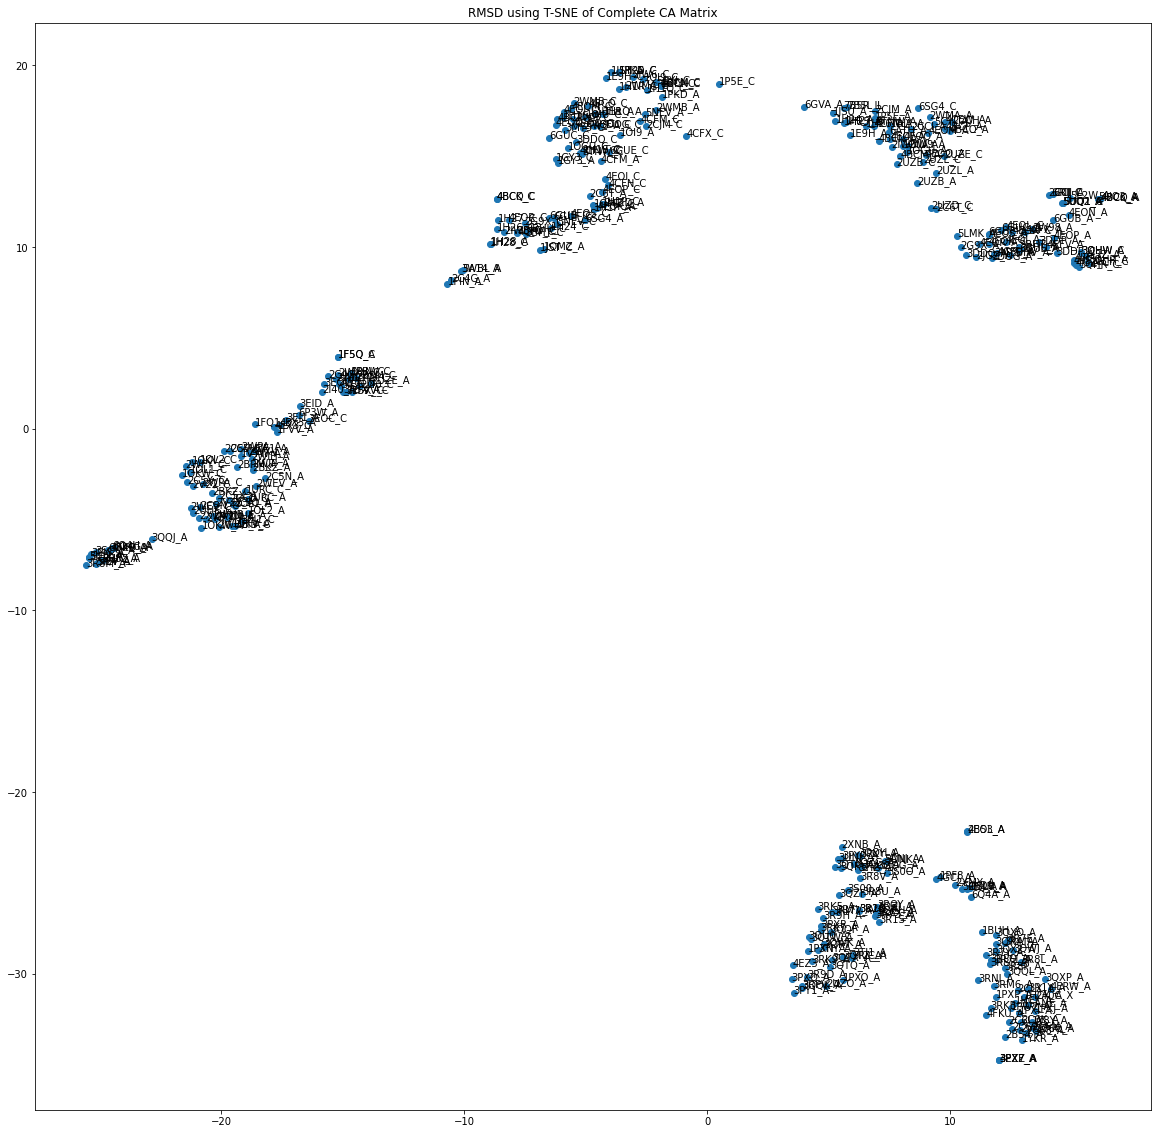

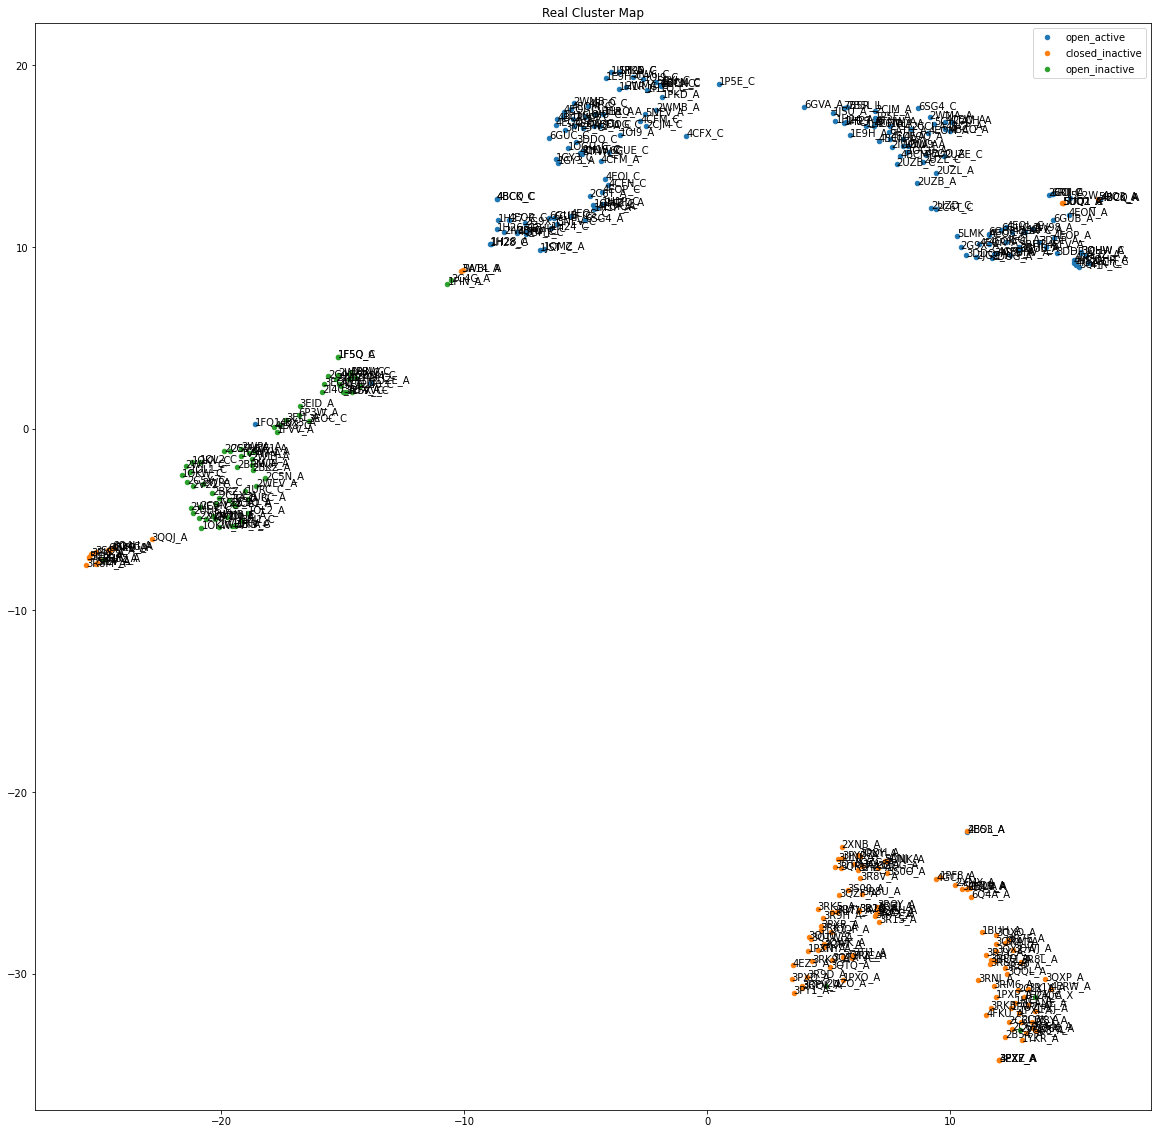

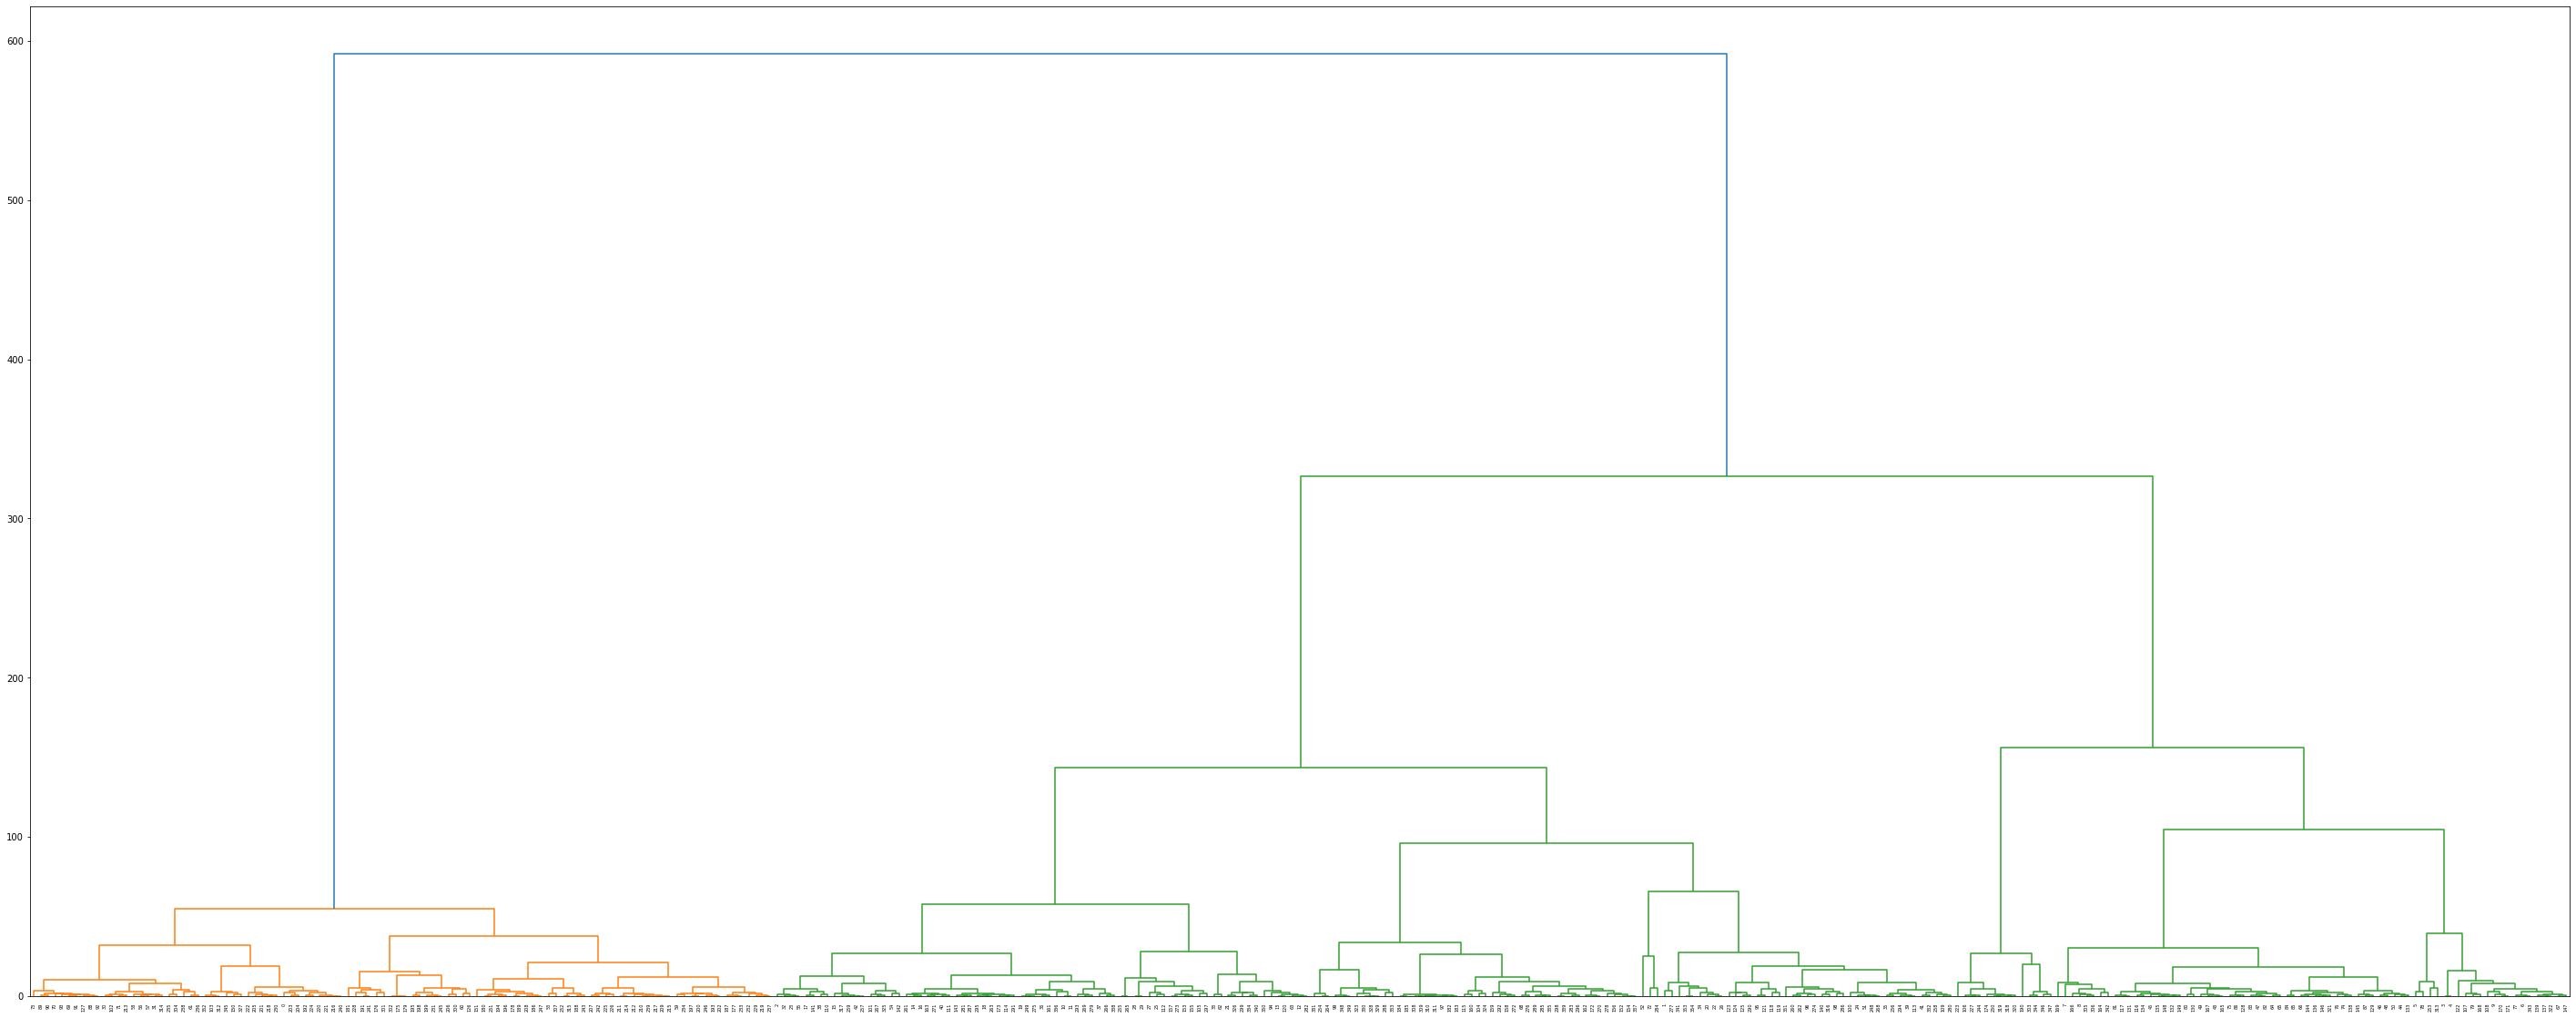

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 104
cluster 1, length: 165
cluster 2, length: 86
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
closed_inactive   0.971154  0.834711  0.897778
open_active       0.969697  0.987654  0.978593
open_inactive     0.802326  0.958333  0.873418
Averages          0.914392  0.926899  0.916596
out:
                            Real closed_inactive  Real open_active  Real open_inactive
Predicted closed_inactive                   101                 0                   3
Predicted open_active                         5               160                   0
Predicted open_inactive                      15                 2                  69
----------------------------------------------------------

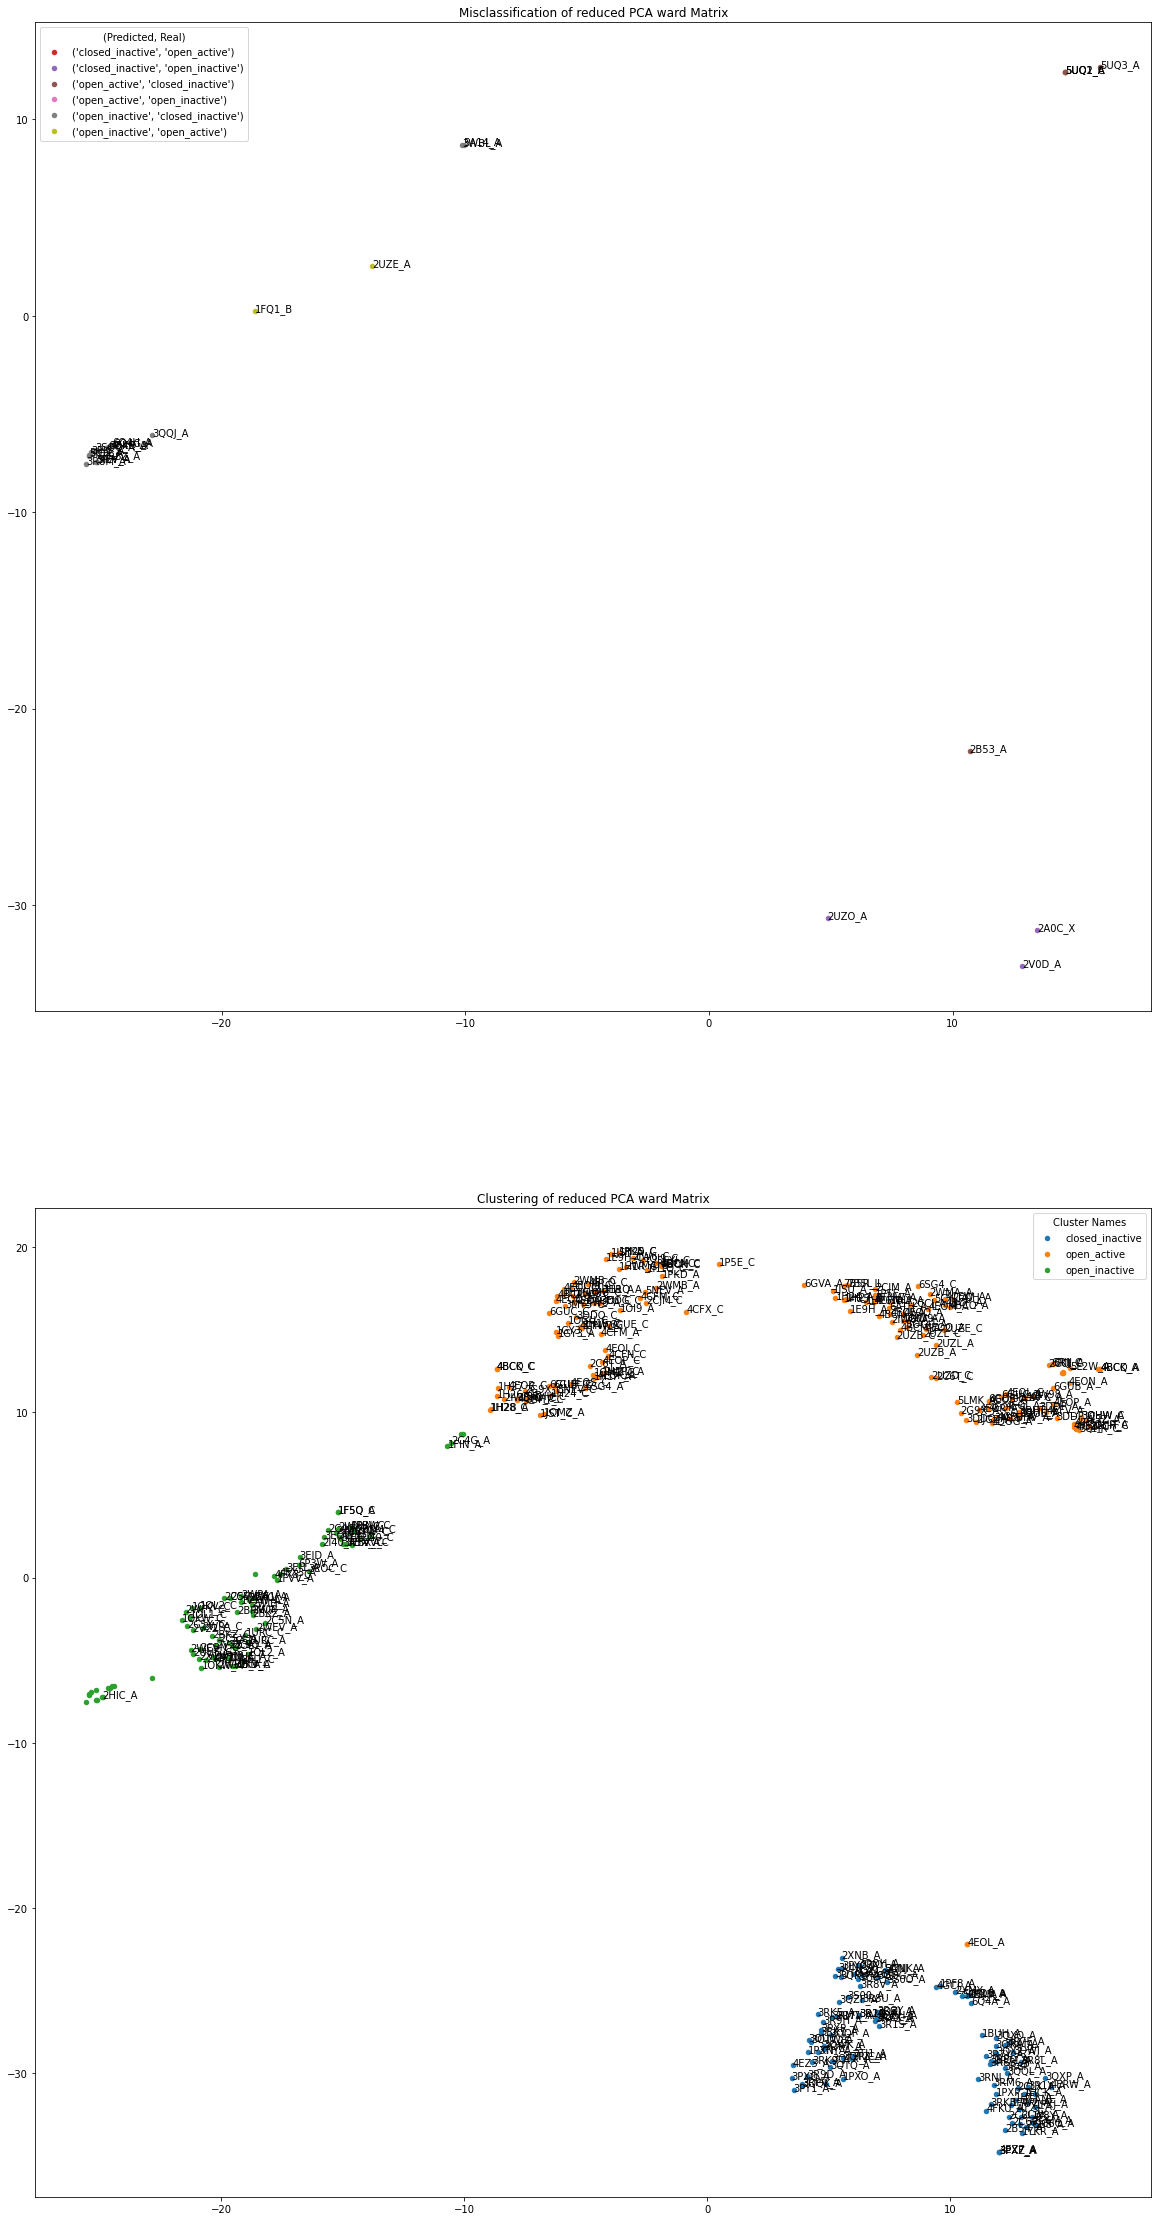

(#missing residues, percentage) [(0, 0.025252525252525252), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.04819277108433735), (5, 0.0), (6, 0.18181818181818182), (8, 1.0), (9, 1.0), (10, 0.8), (11, 1.0), (12, 1.0)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [5, 0, 0, 0, 4, 0, 2, 0, 4, 2, 4, 3, 1]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [198, 2, 15, 23, 83, 8, 11, 0, 4, 2, 5, 3, 1]


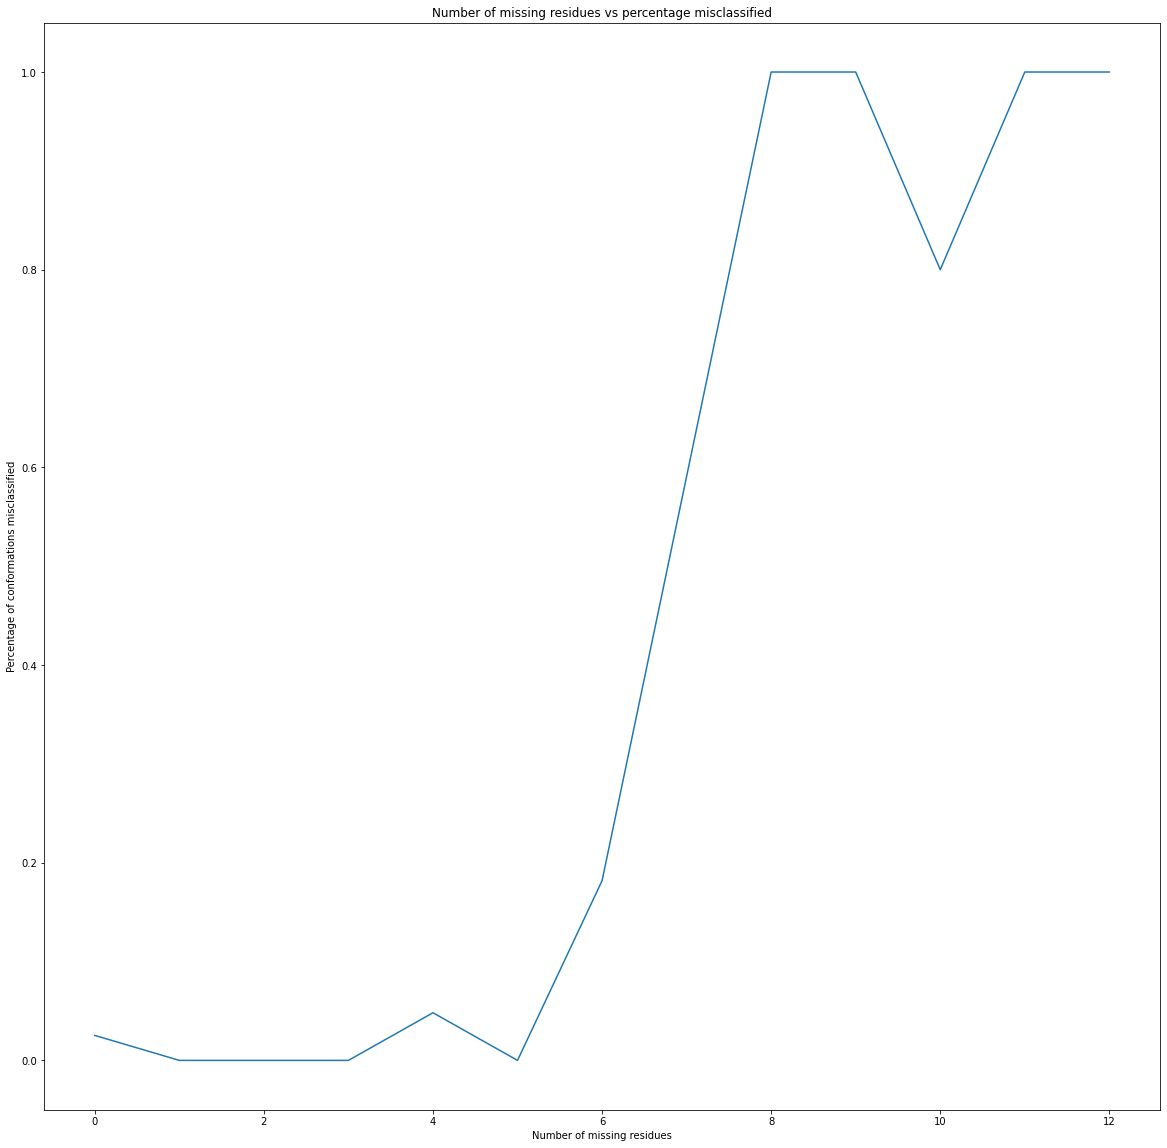

In [5]:
info(matrix_seg_coords,"Complete CA", reduced_chains_list,annotated_dict_list,complete = False, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

### Experiment 2
Threshold = 298, we keep all of our conformations
### Analysis
Although still an F1 score of 0.67, which isn't as bad as the RMSD matrix, the data shows 4 obvious clusters probably resulting from the value imputation. In fact,plotting amount of residues missing vs precentage of misclassification, the error obviously comes from the imputation since there's a clear upward trend in misclassification especially when the number of missing residues surpasses 9, a majority are misclassified. Since the two segments have a combined length of 22, 9 is a sizeable proportion of missing information. From the Cluster figure we can see that one specific cluster all misclassified.  
Note: the classification results F1 score are based on the MICE imputation which is semi-random based on the samples used.

In [6]:
calc_coord_based_matrix(298)

with open("reduced_chains_list.var","rb") as reduced_chains_list_var:
   reduced_chains_list = pickle.load(reduced_chains_list_var)
   reduced_chains_list_var.close()
#print(f"chains_list: {chains_list}")
with open("structures/opened_active.var", "rb") as open_active_var:
    open_active_list = pickle.load(open_active_var)
    open_active_var.close()
with open("structures/closed_inactive.var", "rb") as closed_inactive_var:
    closed_inactive_list = pickle.load(closed_inactive_var)
    closed_inactive_var.close()
with open("structures/opened_inactive.var", "rb") as open_inactive_var:
    open_inactive_list = pickle.load(open_inactive_var)
    open_inactive_var.close()

print(f"open_active: {len(open_active_list)}")
print(f"closed_inactive: {len(closed_inactive_list)}")
print(f"open_inactive: {len(open_inactive_list)}")
annotated_dict_list_codes= {"open_active": open_active_list, "closed_inactive": closed_inactive_list, "open_inactive": open_inactive_list} #dictionary of codes list
annotated_dict_list ={"open_active": list(), "closed_inactive": list(), "open_inactive": list()} #dictionary of list of indices
for i,conformation in enumerate(reduced_chains_list):
    for j,l in enumerate(annotated_dict_list_codes):
        if conformation in annotated_dict_list_codes[l]:
            #print(f"l: {l}")
            annotated_dict_list[l].append(i)
print(f"reduced lengths")
for key in annotated_dict_list:
    print(f"{key}: {len(annotated_dict_list[key])}")

with open("matrix_seg_coords.var", "rb") as matrix_seg_coords_var:
   matrix_seg_coords = (pickle.load(matrix_seg_coords_var))
   matrix_seg_coords_var.close()
print(f"matrix_seg_coords: {np.shape(matrix_seg_coords)}")
print(f"reduced_chains_list: {np.shape(reduced_chains_list)}")


Threshold: 298 amount removed: 0
new_seg_list: 531
imputation done
open_active: 162
closed_inactive: 277
open_inactive: 92
reduced lengths
open_active: 162
closed_inactive: 277
open_inactive: 92
matrix_seg_coords: (531, 2)
reduced_chains_list: (531,)


shape axis1: (531,) axis2: (531,)
group: open_active
group: closed_inactive
group: open_inactive


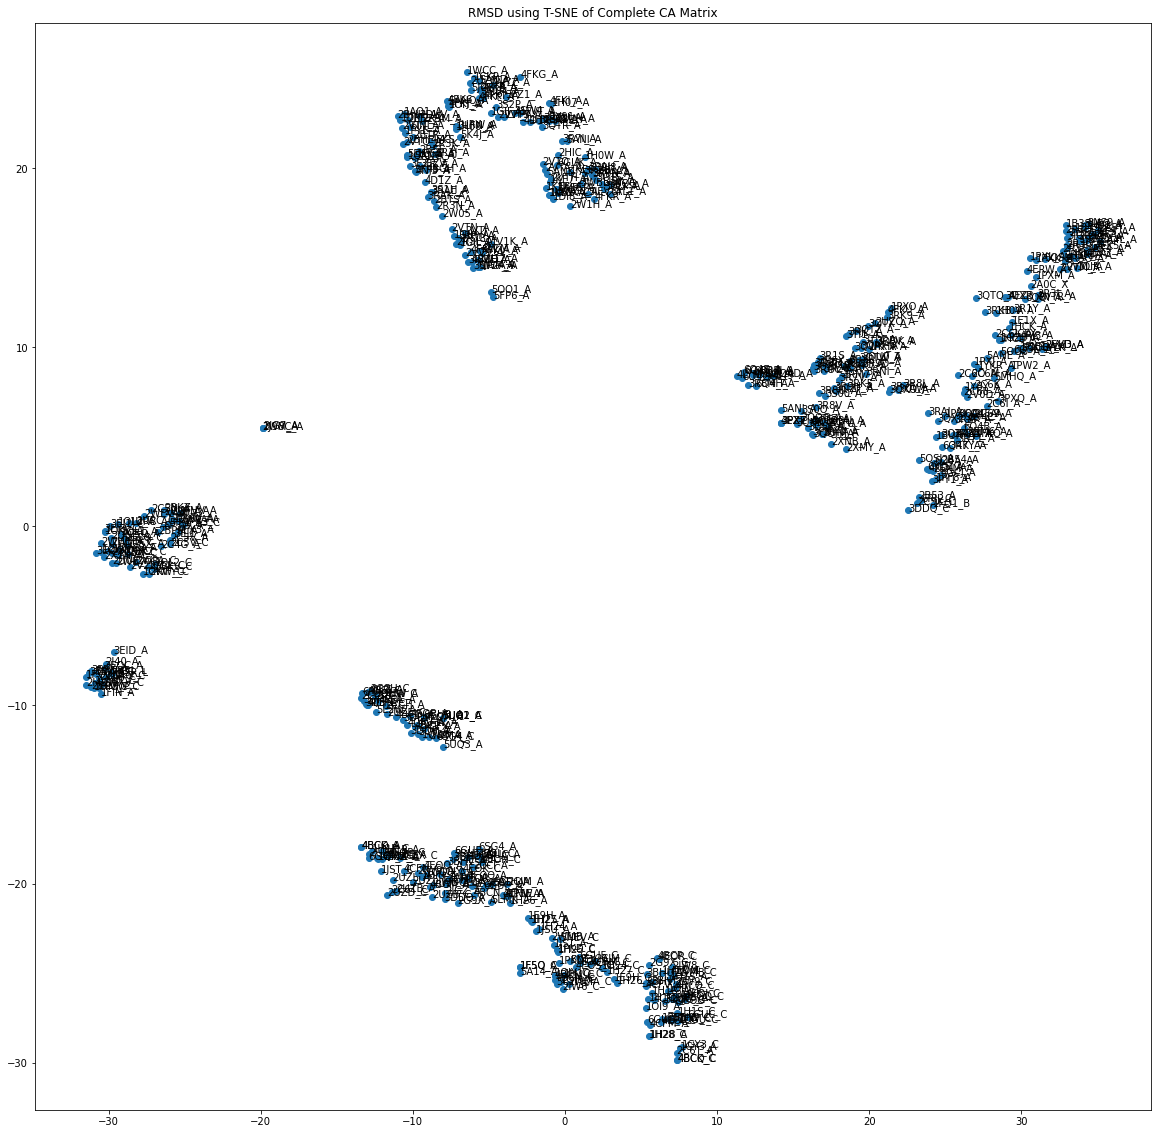

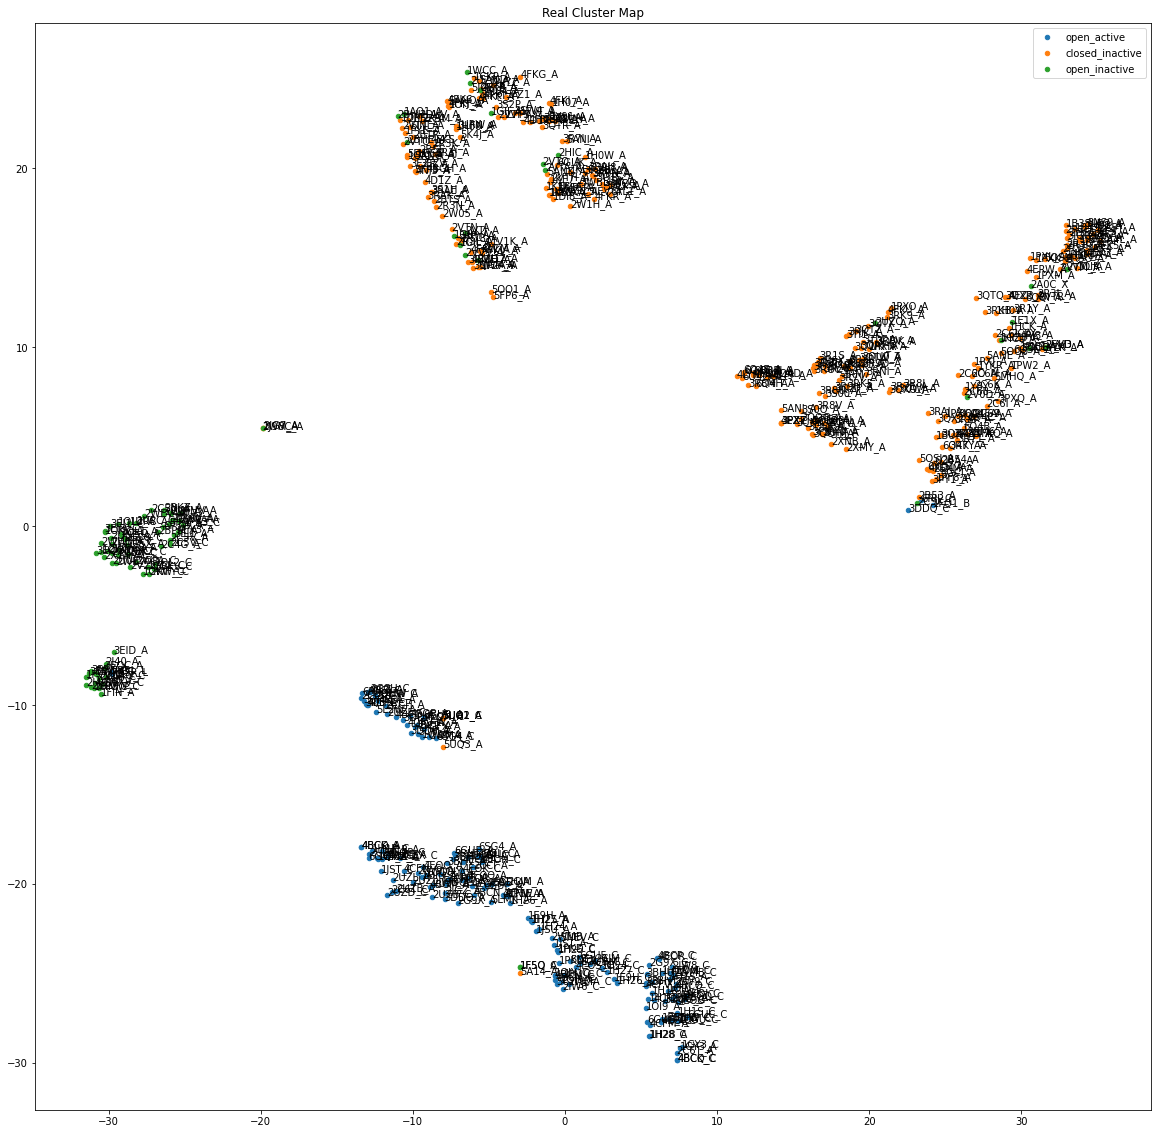

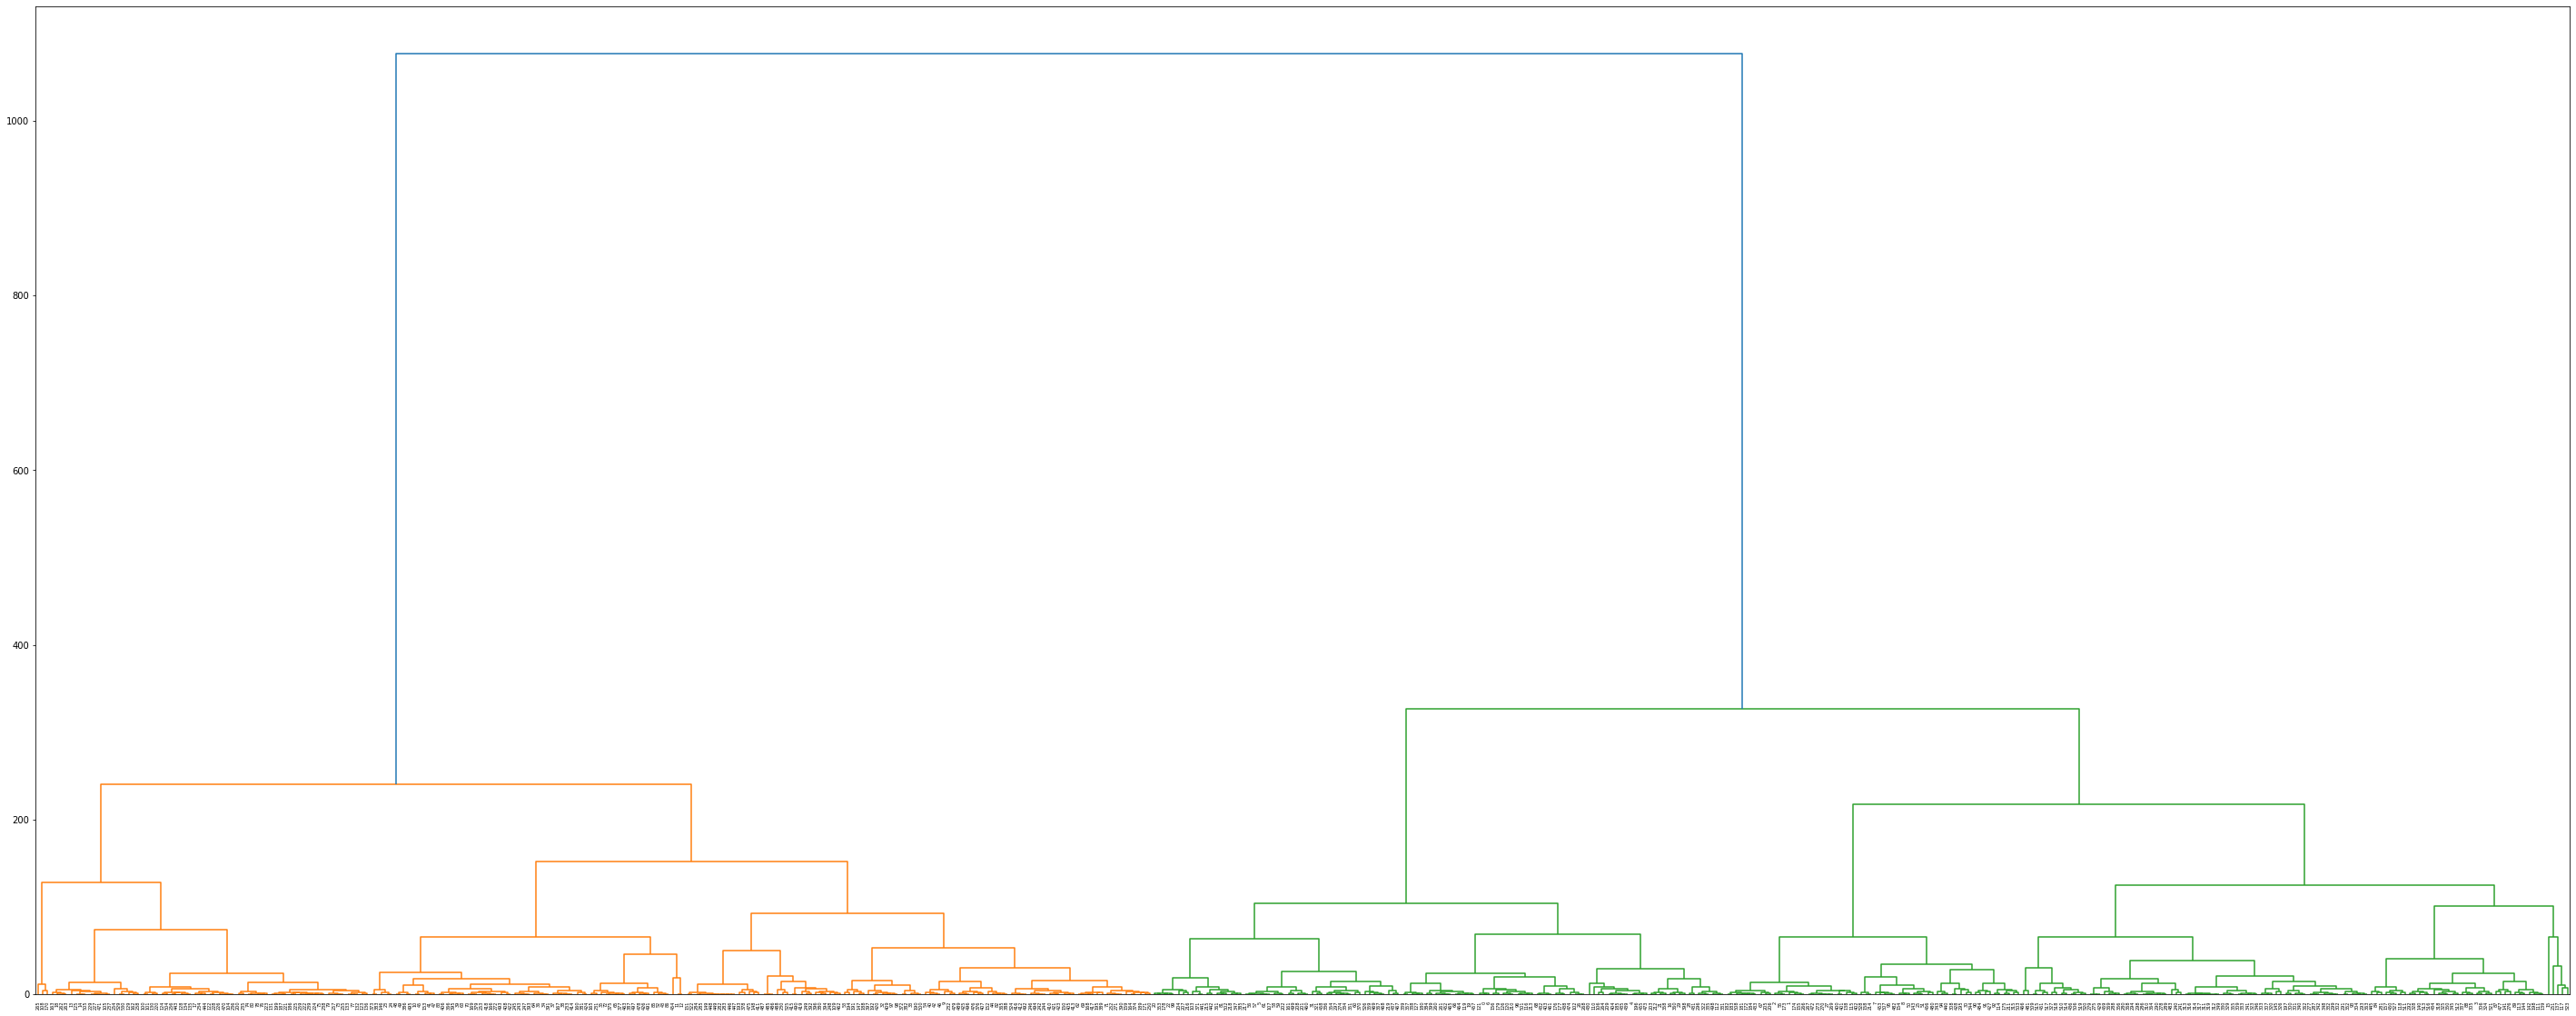

Dendrogram plotted
------------------------------------------------------------
STATISTICS
------------------------------------------------------------
cluster 0, length: 120
cluster 1, length: 177
cluster 2, length: 234
------------------------------------------------------------
MACRO AVERAGES
------------------------------------------------------------
                 Precision    Recall  F1 score
open_inactive     0.125000  0.163043  0.141509
closed_inactive   0.932203  0.595668  0.726872
open_active       0.679487  0.981481  0.803030
Averages          0.578897  0.580064  0.557137
out:
                            Real open_inactive  Real closed_inactive  Real open_active
Predicted open_inactive                    15                   105                 0
Predicted closed_inactive                   9                   165                 3
Predicted open_active                      68                     7               159
---------------------------------------------------------

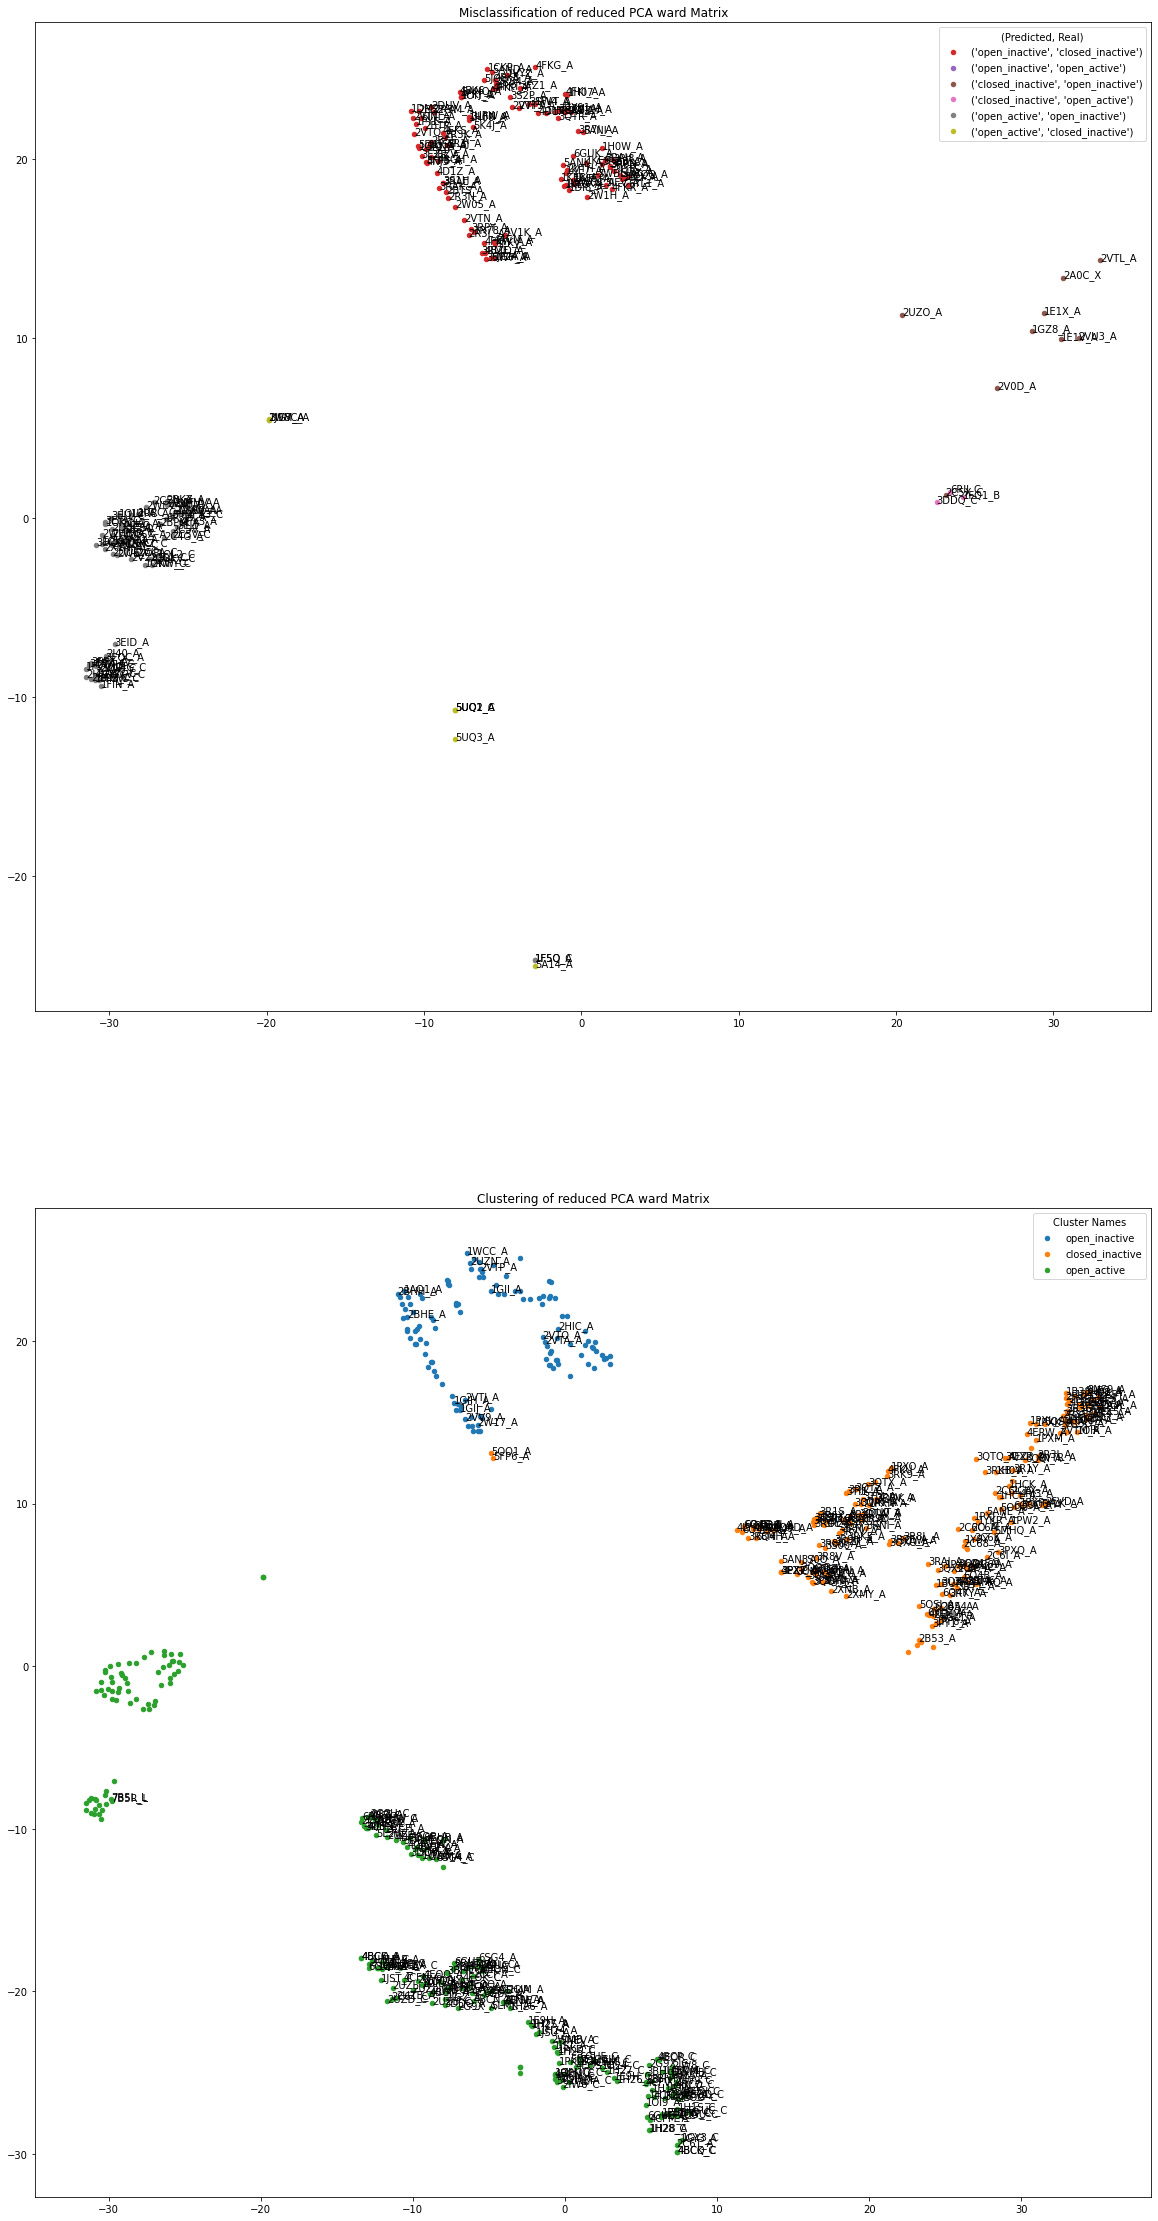

(#missing residues, percentage) [(0, 0.3383838383838384), (1, 0.0), (2, 0.0), (3, 0.2608695652173913), (4, 0.03614457831325301), (5, 0.0), (6, 0.18181818181818182), (7, 0.10526315789473684), (8, 0.20689655172413793), (9, 0.13333333333333333), (10, 0.4444444444444444), (11, 0.7142857142857143), (12, 0.6), (13, 0.8888888888888888), (14, 0.9285714285714286), (15, 0.7647058823529411), (16, 0.8181818181818182), (17, 0.9444444444444444), (18, 0.8125), (19, 0.8461538461538461)]
miclassified_missing (list where value at i is amount of misclassified and i is amount of missing residues:
 [67, 0, 0, 6, 3, 0, 2, 2, 6, 2, 4, 5, 3, 16, 13, 13, 9, 17, 13, 11]
totals_missing (list where value at i is number of conformations and i is amount of missing residues:
 [198, 2, 15, 23, 83, 8, 11, 19, 29, 15, 9, 7, 5, 18, 14, 17, 11, 18, 16, 13]


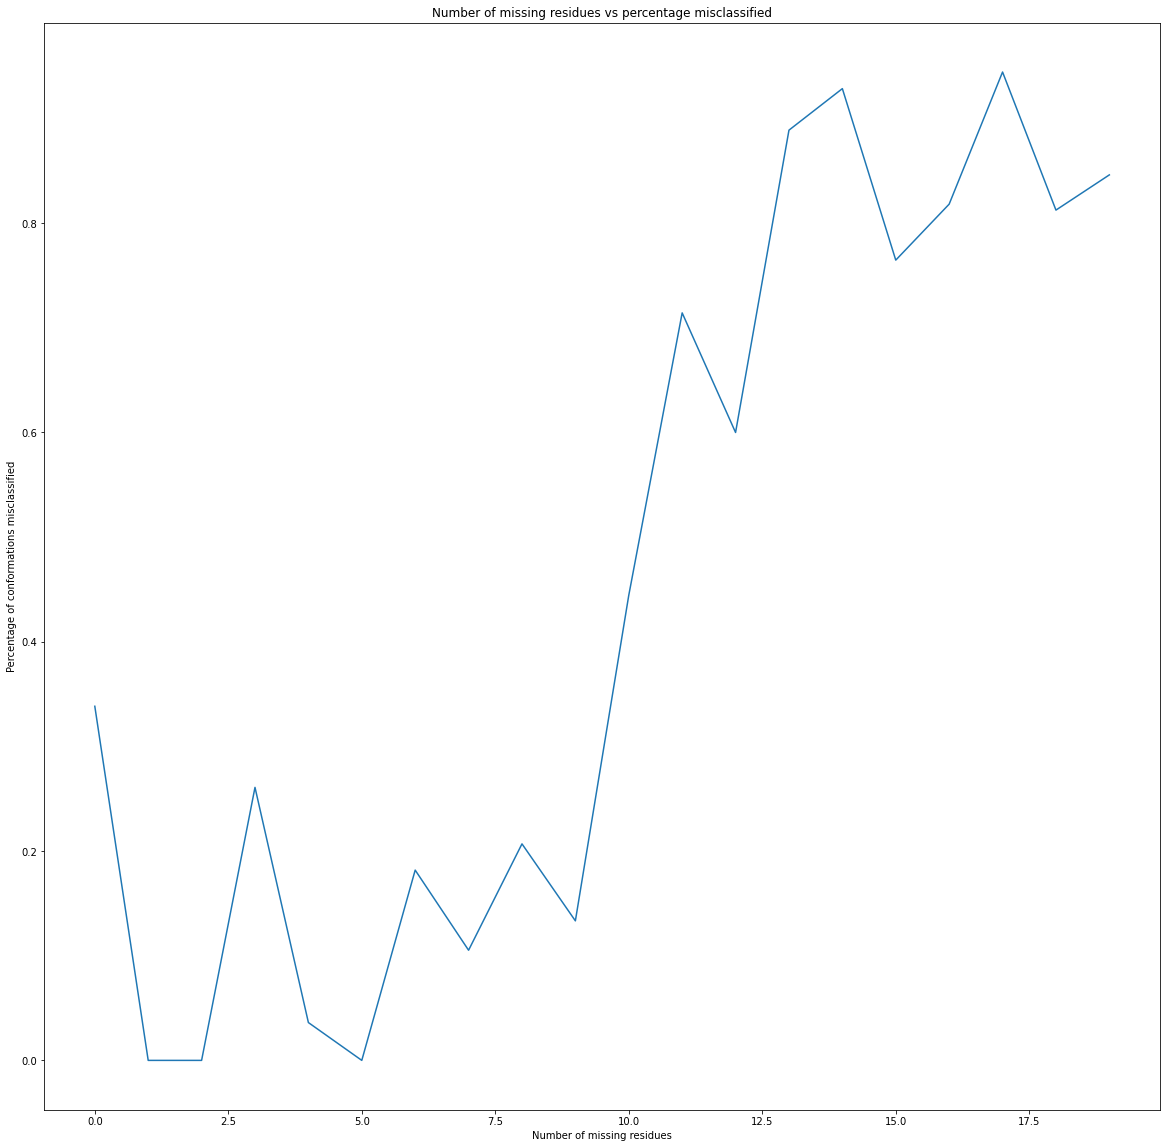

In [7]:
info(matrix_seg_coords,"Complete CA", reduced_chains_list,annotated_dict_list,complete = False, kernel="linear",hierarchy_method = "ward", no_clusters=3,tsne=True)

### Multi Run
The results vary upon MICE imputation results, thus multirun will find the average over n different imputation instances

In [5]:
final_averages = multirun(annotated_dict_list,threshold=7,iter=50)

Threshold: 7 amount removed: 176
imputation done
Iterations: 1, f1_avg: 0.9610429399880861, p_avg: 0.9621012383724249, r_avg: 0.9601401217562833
